In [32]:
# from fastai.collab import *
# !pip3 install pandas
from fastai import *
from fastai.vision import *
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = "."
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=10, bs=64).normalize(imagenet_stats)

In [26]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['background', 'next', 'previous'], 3, 440, 109)

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [27]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [28]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.606683,0.809996,0.357798,02:55
1,1.142960,0.362148,0.137615,01:10
2,0.842774,0.219436,0.064220,01:10
3,0.670068,0.209720,0.073394,01:13
4,0.550972,0.162984,0.036697,01:10
5,0.474953,0.151684,0.027523,01:06
6,0.405167,0.139709,0.036697,01:07
7,0.361138,0.120869,0.036697,01:14
8,0.333528,0.107807,0.036697,01:39
9,0.314138,0.108216,0.036697,01:17


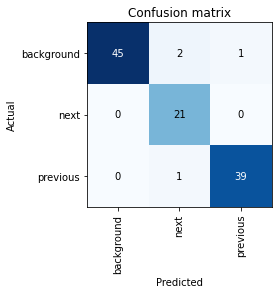

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
# for i in range(2,12):
img = open_image('./test19.jpeg')
img.show()
pred = learn.predict(img)
l_list = data.classes
preds = [str(round(x.item(),4)*100)+"%" for x in pred[2]]
preds = {l_list[index] : preds[index] for index in range(3)}
print(preds)

In [30]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))

In [34]:
learn.freeze()
learn.export()
# learn.purge()